In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

import matplotlib.pyplot as figure
import seaborn as sns  # you might not have this installed -- it makes graphs prettier and sometimes easier
# %matplotlib inline 
import umap
import tldextract
from sklearn.preprocessing import StandardScaler
import pandas as pd
import publicsuffixlist as psl
import os
from tqdm import tqdm_notebook
from sklearn import preprocessing
from random import sample
import glob, os 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import hdbscan
from scipy.sparse import hstack
from random import sample
from sklearn.cluster import DBSCAN
import pickle

In [4]:
textFile = pd.read_csv("dataFromReneeNewFile(each60K).csv")

In [5]:
textFile = textFile.drop_duplicates()

In [6]:
textFile.LABELS.value_counts() 

-1    586234
 7    208785
 4    119491
 0    109330
 3     60000
 1     60000
Name: LABELS, dtype: int64

In [7]:
textFile = textFile.sample(frac=1,random_state= 290)

In [8]:
textFile

,prefix,LABELS,bigramPref,pref_len
616445,dlw167-2.vault.qa,1,^dlw167-2.vault.qa$,17
1196870,wwwle.affiliate-dev,4,^wwwle.affiliate-dev$,19
40700,www.livio,7,^www.livio$,9
564441,ns123.is.stage,-1,^ns123.is.stage$,14
1139107,bestkim99,0,^bestkim99$,9
505937,manohar,0,^manohar$,7
197861,gamma.r3,-1,^gamma.r3$,8
158078,sni237411,7,^sni237411$,9
1012360,cjoalert,-1,^cjoalert$,8
1016120,demokol,-1,^demokol$,7


In [9]:
textFile = textFile.reset_index(drop = True)

In [88]:
resolvedDomains = pd.read_parquet('FarsightPrefixesResolvedSample1.parquet', engine= "fastparquet")

In [111]:
resolvedDomains = resolvedDomains.sample(n = 5000)

In [112]:
resolvedPref = list(resolvedDomains.prefix)

In [113]:
len(resolvedPref)

5000

In [114]:
i = 124453
for ele in resolvedPref:
    textFile.loc[i,'prefix'] = ele
    textFile.loc[i,'LABELS'] = 5
    i += 1

In [150]:
textFile.LABELS.value_counts()

1    94454
3    15000
2     9999
4     5000
Name: LABELS, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [177]:
textFile['bigramPref'] = ["^{0}$".format(row['prefix']) for i, row in textFile.iterrows()] 

In [11]:
textFile['prefix'] = textFile['prefix'].astype('str')

In [12]:
textFile['bigramPref'] = textFile['bigramPref'].astype('str')

In [180]:
pref_len = [len(row['prefix']) for i,row in textFile.iterrows()]
textFile['pref_len'] = pref_len

In [13]:
# textFile['uniqueCharacLen'] = [len(set(row['prefix'])) for i,row in textFile.iterrows() ]

In [13]:
XAll = textFile[['bigramPref','pref_len','prefix']]
target = textFile[['LABELS']]

In [14]:
qname_train, qname_test, label_train, label_test = train_test_split(XAll, target, test_size=0.2, random_state = 2240)

In [15]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X_train = vectorizer.fit_transform(qname_train['bigramPref'])

In [16]:
combined_train_X = hstack((X_train ,np.array(qname_train['pref_len'])[:,None])).tocsr()

In [17]:
# combinedtotalFeatures = hstack((combined_train_X ,np.array(qname_train['uniqueCharacLen'])[:,None])).tocsr()
combined_train_X

<915072x1626 sparse matrix of type '<class 'numpy.int64'>'
	with 13753998 stored elements in Compressed Sparse Row format>

In [18]:
X_test = vectorizer.transform(qname_test['bigramPref'])

In [19]:
combined_test_X = hstack((X_test,np.array(qname_test['pref_len'])[:,None])).tocsr()

In [20]:
combined_test_X

<228768x1626 sparse matrix of type '<class 'numpy.int64'>'
	with 3434007 stored elements in Compressed Sparse Row format>

In [17]:
# combinedtotalFeatures_test = hstack((combined_test_X ,np.array(qname_test['uniqueCharacLen'])[:,None])).tocsr()
testPrefix = combined_test_X.toarray()

In [18]:
testPrefix

array([[ 0,  0,  0, ...,  0,  0, 43],
       [ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0,  0, ...,  0,  0,  4],
       ...,
       [ 0,  0,  0, ...,  0,  0, 18],
       [ 0,  0,  0, ...,  0,  0,  8],
       [ 0,  0,  0, ...,  0,  0, 13]], dtype=int64)

In [ ]:
pd.DataFrame.from_records(testPrefix)

In [21]:
model = LogisticRegression(solver= 'lbfgs')

In [22]:
model.fit(combined_train_X, label_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
filename = 'modelReneeClusters'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()

In [23]:
y_pred=model.predict(combined_test_X)
print("%.2f" %accuracy_score(label_test ,y_pred))

0.71


In [30]:
# y_prob = model.predict_proba(combined_test_X)[:,1]
# fpr, tpr, thresholds = roc_curve(label_test, y_prob)
# auc = roc_auc_score(label_test, y_prob)
# print(auc)

cnf_matrix = confusion_matrix(label_test, y_pred)
print(cnf_matrix)

[[5317  493   33]
 [ 808 2817   14]
 [ 209   49  935]]


In [228]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)

In [229]:
cnf_matrix.sum(axis=0)

array([6201, 4465], dtype=int64)

In [230]:
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)

TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [231]:
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC

array([0.86583536, 0.86583536])

In [232]:
TPR = TP/(TP+FN)
TPR

array([0.90165039, 0.82085448])

In [233]:
TNR = TN/(TN+FP) 
TNR

array([0.82085448, 0.90165039])

In [234]:
FNR = FN/(TP+FN)
FNR

array([0.09834961, 0.17914552])

In [426]:
classes = [1,2,3]

In [207]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [237]:
# cnf_matrix = confusion_matrix(label_test, y_pred,labels=[1,2,4])

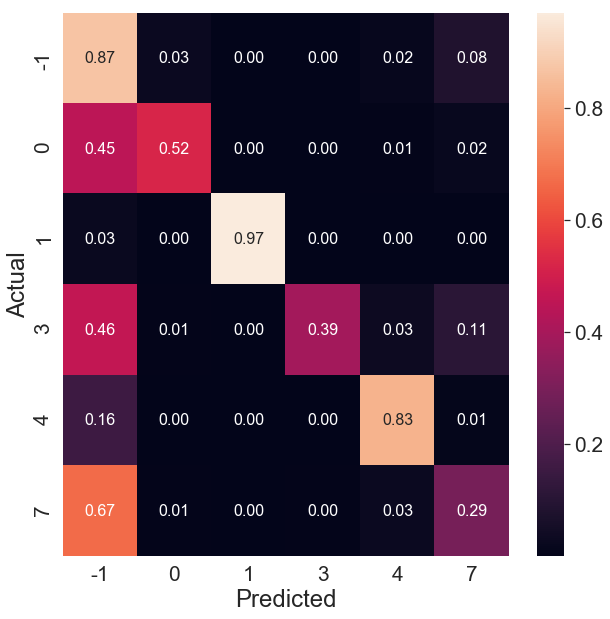

In [25]:
conf_mat = confusion_matrix(label_test, y_pred)
cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.9)
sns.heatmap(cm, annot=True, fmt = '.2f',
            xticklabels=[-1,0,1,3,4,7], yticklabels=[-1,0,1,3,4,7], annot_kws={"size": 16})
plt.ylabel('Actual', fontsize = 24)
plt.xlabel('Predicted', fontsize = 24)
plt.show()